In [1]:
import numpy as np
import pandas as pd
import sklearn
X = pd.read_csv("train.csv")


In [2]:
X

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X.shape

(42000, 785)

In [4]:
X_train = X.iloc[:,1:]
y_train = X.iloc[:,0]

In [5]:
X_train, y_train

(       pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       0       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0       0   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 41995       0       0       0       0       0       0       0       0       0   
 41996       0       0       0       0       0       0       0       0       0   
 41997       0       0       0       0       0       0       0       0       0   
 41998       0       0       0       0       0       0       0       0       0   
 41999       0       0       0       0       0       0       0       0       0   
 
        pixel9

In [6]:
from sklearn.model_selection import ShuffleSplit
data = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
# data.get_n_splits(X)
for train_index, test_index in data.split(X_train):
    print("Train:", train_index, "test:",test_index)

Train: [39317 32837 16644 ... 30403 21243  2732] test: [16275 19204 18518 ... 26193 26564 27420]


In [7]:
train_index.shape, test_index.shape

((33600,), (8400,))

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
cnnimg = plt.imread('test.png')
print("shape of cnnimg", cnnimg.shape)

shape of cnnimg (856, 1530, 4)


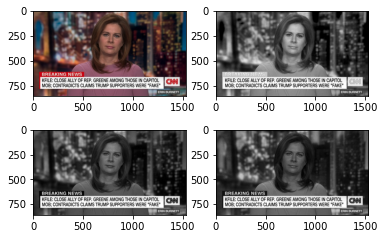

In [82]:
fig = plt.figure()
a = fig.add_subplot(2,2,1)
imgplot = plt.imshow(cnnimg)
a = fig.add_subplot(2,2,2)
imgplot = plt.imshow(cnnimg[:,:,0],cmap='gray')
a = fig.add_subplot(2,2,3)
imgplot = plt.imshow(cnnimg[:,:,1],cmap='gray')
a = fig.add_subplot(2,2,4)
imgplot = plt.imshow(cnnimg[:,:,2],cmap='gray')



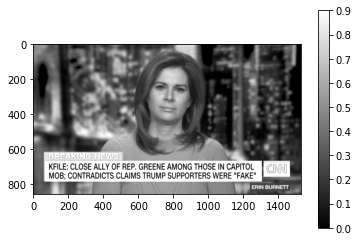

In [74]:
imgplot = plt.imshow(cnnimg[:,:,0],cmap="gray",clim=(0,0.9))
plt.colorbar()

In [68]:
#plt.hist(cnnimg[:,:,0:3].ravel(),bins=256,density=True,cumulative=False,histtype='step',orientation='vertical',log=True)

In [32]:
X_train.shape

(42000, 784)

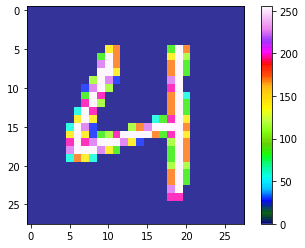

In [90]:
digits_data = X_train.to_numpy().reshape(-1,28,28)
imgplot = plt.imshow(digits_data[205],cmap='gist_ncar',alpha=0.8)
plt.colorbar()

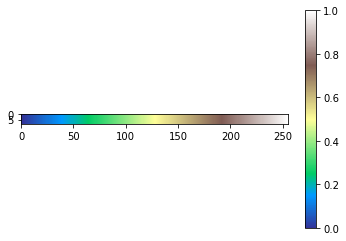

In [88]:
height = 10
width = 256
band = [[j/(width-1) for j in range(0,width)] for i in range(0,height)]
imgplot = plt.imshow(band, cmap = 'terrain')
plt.colorbar()

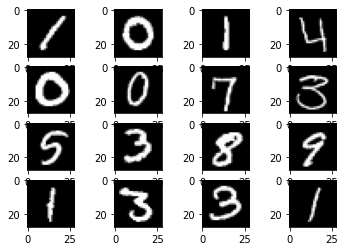

In [102]:
import matplotlib.figure as figure
digimg = X_train.to_numpy().reshape(-1,28,28)
fig = plt.figure()
#figure.SubplotParams(wspace=30,hspace=15)
x_nums = 4
y_nums = 4
for i in range(0,x_nums):
    for j in range(0,y_nums):
        seq = i*y_nums+j
        a = fig.add_subplot(x_nums,y_nums,seq+1)
        imgplot = plt.imshow(digimg[seq],cmap='gray')

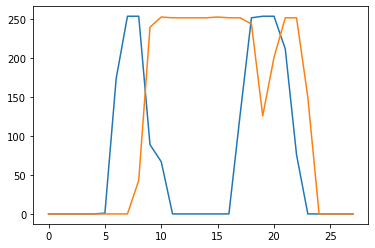

In [145]:
fig, ax = plt.subplots()
ax.plot(digimg[1,10].T)
ax.plot(digimg[10,10].T)

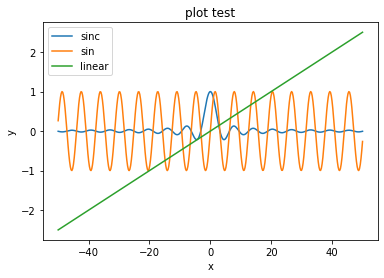

In [161]:
x = np.linspace(-50,50,400)
y1 = np.sin(x)/x
y2 = np.sin(x)
fig, ax = plt.subplots()
ax.plot(x,y1,label='sinc')
ax.plot(x,y2,label='sin')
#ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('plot test')
plt.plot(x,x/20,label='linear')
plt.legend()

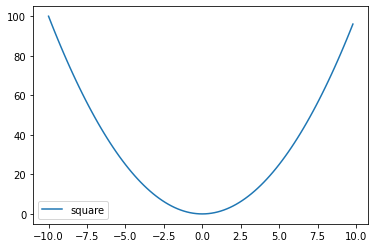

In [179]:
plt.plot(np.arange(-10,10,0.2),np.arange(-10,10,0.2)**2,label='square')

plt.legend()

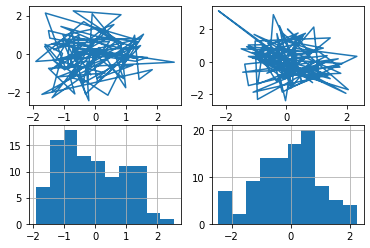

In [210]:
data1, data2, data3, data4 = np.random.randn(4, 100)
fig, ax = plt.subplots(2,2)
ax[0,0].plot(data1,data2)
ax[0,1].plot(data3,data4)
p1 = pd.Series(data1)
p2 = pd.Series(data2)
p1.hist(ax=ax[1,0])
p2.hist(ax=ax[1,1])
plt.draw()

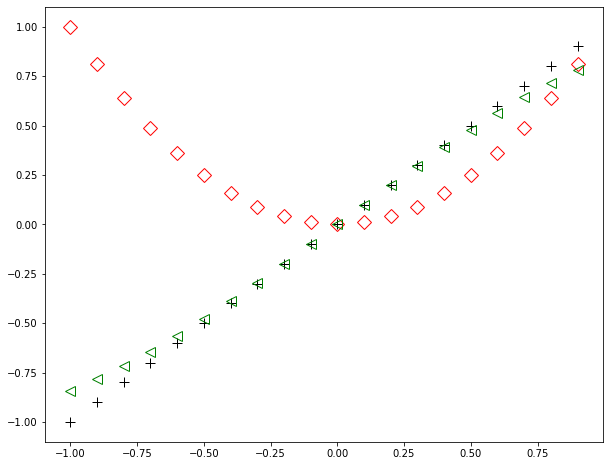

In [267]:
x = np.arange(-1,1,0.1)
plt.figure(figsize=(10,8))
plt.plot(x,x,'+k',x,x**2,'Dr',x,np.sin(x),'g<',markersize=10,fillstyle='none')

# y.hist(bins=100)
plt.draw()

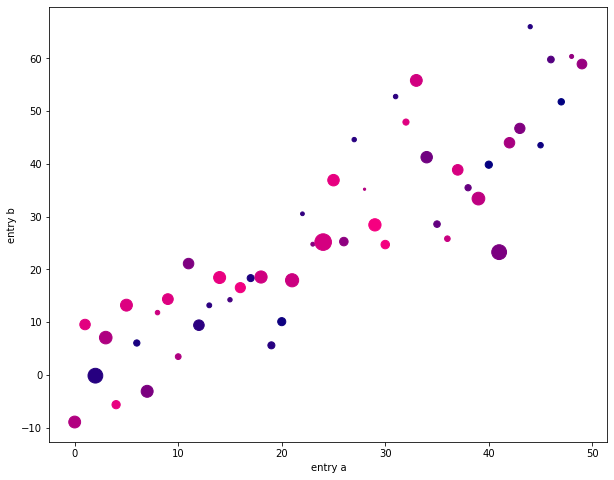

In [298]:
data = {'a': np.arange(50),
        'c': np.random.rand(50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100
data['c'] = np.c_[data['c'],np.zeros(50),np.ones(50)/2]
plt.figure(figsize=(10,8))
plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')

plt.show()

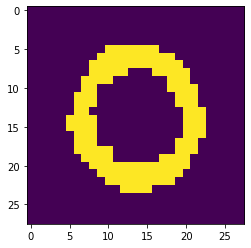

In [333]:
from sklearn import svm
import numpy as np
# plt.imshow(digimg[1])
data=digimg[1]>200
# data2=digimg[1]<=100 * digimg[1]>0
plt.imshow(data)

In [364]:
dots = 28
y = list(range(dots))*dots
x = np.array(y).reshape(dots,dots).T.reshape(-1)
y_train = np.array(data).reshape(-1)
X_train = np.c_[x,y]
print(X_train)
print(y_train)



[[ 0  0]
 [ 0  1]
 [ 0  2]
 ...
 [27 25]
 [27 26]
 [27 27]]
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True  True  True  True  Tr